### Abykeev Sultan
### AIN-2-21

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression



In [ ]:
iris = load_iris()
logreg = LogisticRegression(max_iter = 1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [ ]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.97


In [ ]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv = 5, return_train_score = True)
display(res)

{'fit_time': array([0.09419417, 0.03979063, 0.04686332, 0.03809333, 0.03220773]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [ ]:
import pandas as pd
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.094194,0.0,0.966667,0.966667
1,0.039791,0.0,1.000000,0.966667
2,0.046863,0.0,0.933333,0.983333
3,0.038093,0.0,0.966667,0.983333
4,0.032208,0.0,1.000000,0.975000


Mean times and scores:
 fit_time       0.050230
score_time     0.000000
test_score     0.973333
train_score    0.975000
dtype: float64


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Метки ирисов:\n{}".format(iris.target))

Метки ирисов:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


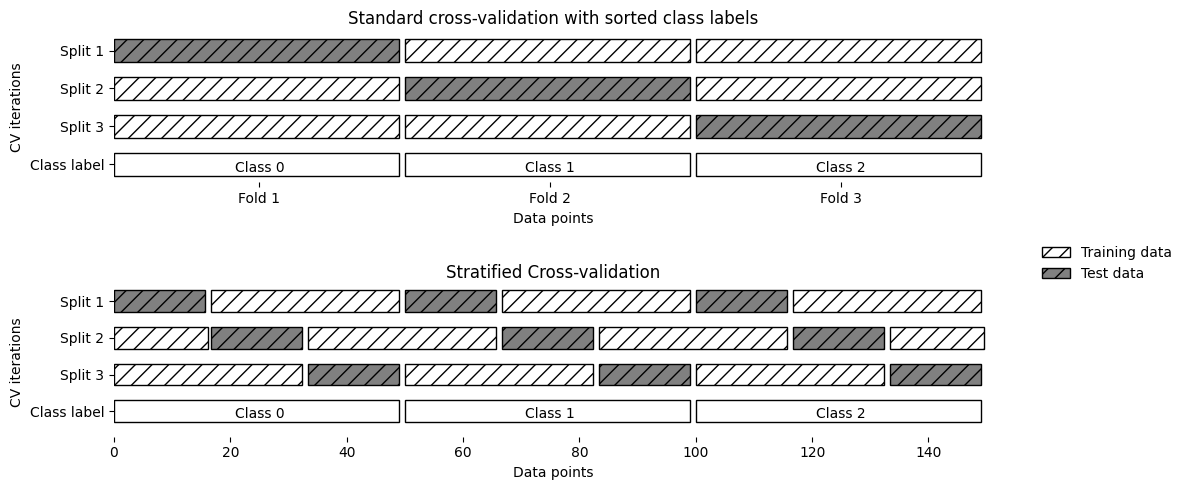

In [ ]:
import mglearn.datasets

mglearn.plots.plot_stratified_cross_validation()

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)

In [ ]:
kfold = KFold(n_splits = 3)
print("Значение правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))

Значение правильности перекрестной проверки:
[0. 0. 0.]


In [ ]:
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)
print("Значение правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))

Значение правильности перекрестной проверки:
[0.98 0.96 0.96]


In [ ]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print("Количество итерации: ", len(scores))
print("Средняя правильность: {:2f}".format(scores.mean()))

Количество итерации:  150
Средняя правильность: 0.966667


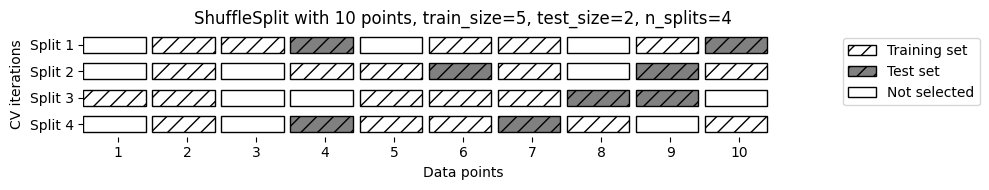

In [ ]:
mglearn.plots.plot_shuffle_split()

In [ ]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print("Значение правильности перекрестной проверки: \n{}".format(scores))

Значение правильности перекрестной проверки: 
[0.94666667 0.94666667 0.97333333 0.98666667 0.96       0.92
 0.97333333 0.93333333 0.96       0.90666667]


In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples = 12, random_state = 0)

groups = [0, 0, 0, 1, 1, 1 , 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, x, y, groups = groups, scoring = None, cv = GroupKFold(n_splits = 3))
print("Значения правильности перекрестной проверки: \n{}".format(scores))

Значения правильности перекрестной проверки: 
[0.75       0.6        0.66666667]


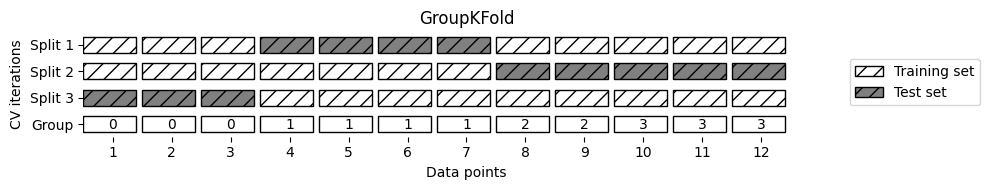

In [ ]:
mglearn.plots.plot_group_kfold()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print("Размер обучающего набора: {} размер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)

        if score > best_score:
            best_score = score
            best_parameters = {"C":C, "gamma": gamma}
print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшее значение параметров: {}".format(best_parameters))

Размер обучающего набора: 112 размер тестового набора: 38
Наилучшее значение правильности: 0.97
Наилучшее значение параметров: {'C': 100, 'gamma': 0.001}


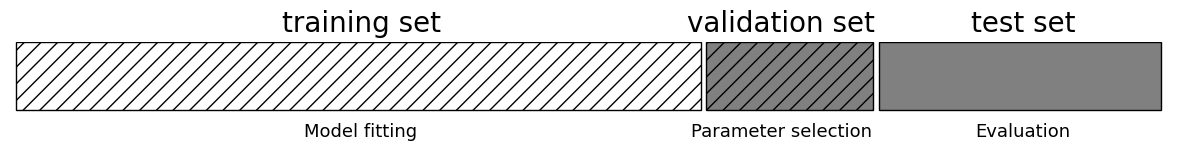

In [ ]:
mglearn.plots.plot_threefold_split()

In [ ]:
from sklearn.svm import SVC
# разбиваем данные на обучающий+проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих
# и проверочных данных, оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))


Размер обучающего набора: 84 размер проверочного набора: 28 размер тестового набора: 38

Лучшее значение правильности на проверочном наборе: 0.96
Наилучшие значения параметров:  {'C': 10, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.92


In [ ]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        score = np.mean(scores)

        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

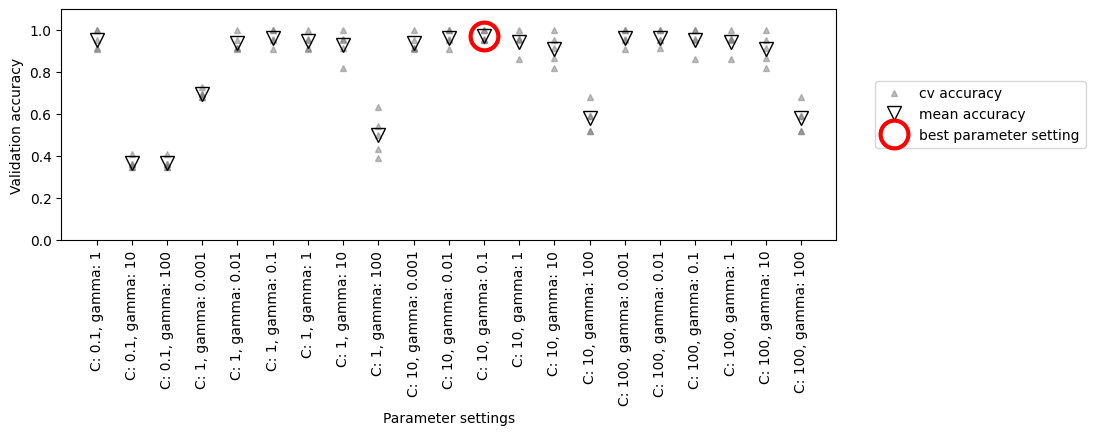

In [ ]:
mglearn.plots.plot_cross_val_selection()

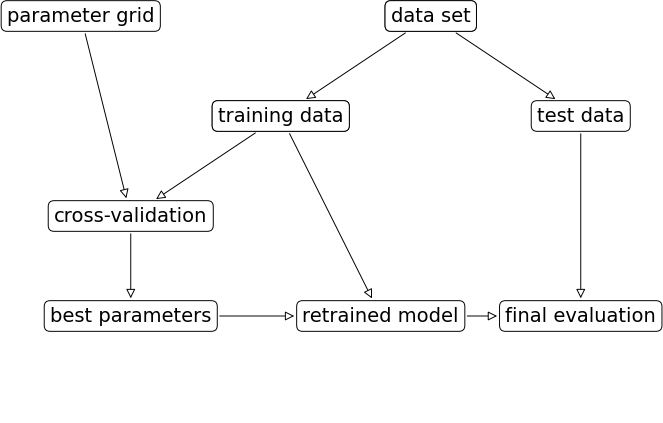

In [ ]:
mglearn.plots.plot_grid_search_overview()

In [ ]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100],
             "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}
print("Сетка параметров: \n{}".format(param_grid))

Сетка параметров: 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


In [ ]:
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс_валидац. правильности: {:.2f}".format(grid_search.best_score_))


Наилучшие значения параметров: {'C': 10, 'gamma': 0.1}
Наилучшее значение кросс_валидац. правильности: 0.97


In [ ]:
print("Наилучшая модель:\n{}".format(grid_search.best_estimator_))

Наилучшая модель:
SVC(C=10, gamma=0.1)


In [ ]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003136,0.003095,0.004800,0.009599,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.002110,0.003106,0.003201,0.003920,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000000,0.000000,0.001617,0.003234,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.006248,0.007653,0.000000,0.000000,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000917,0.001835,0.006426,0.007875,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


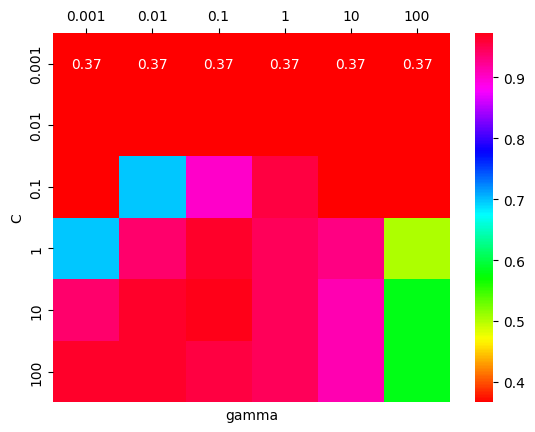

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

scores = np.array(results.mean_test_score).reshape(6,6)

ax = sns.heatmap(scores, annot = True, xticklabels = param_grid['gamma'], yticklabels = param_grid['C'], cmap = 'hsv')
ax.set(xlabel = 'gamma', ylabel = 'C')
ax.xaxis.tick_top()

plt.show()

In [ ]:
param_grid = [{'kernel' : ['rbf'],
               'C' : [0.001,0.01,0.1,1,10,100],
               'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel' : ['linear'],
             'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]
print('List of grids:\n{}'.format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print("Наилучшее значение параметров {}".format(grid_search.best_params_))
print("Наилучшее значение кросс - валидац. правильности {:.2f}".format(grid_search.best_score_))

Наилучшее значение параметров {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Наилучшее значение кросс - валидац. правильности 0.97


In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006028,0.003065,0.002554,0.003292,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
1,0.001601,0.003202,0.002411,0.003206,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
2,0.000000,0.000000,0.003472,0.004273,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
3,0.001606,0.003212,0.000000,0.000000,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
4,0.000000,0.000000,0.003132,0.006264,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
5,0.000000,0.000000,0.003124,0.006248,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
6,0.003124,0.006248,0.000000,0.000000,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
7,0.000000,0.000000,0.000000,0.000000,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
8,0.003124,0.006248,0.000000,0.000000,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
9,0.006245,0.005845,0.000000,0.000000,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27


In [ ]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5), iris.data, iris.target, cv = 5)
print("Знач-е прав-и перекрестной пр-ки: ", scores)
print("Среднее знач-е прав-и перекрестной проверки: ", scores.mean())

Знач-е прав-и перекрестной пр-ки:  [0.96666667 1.         0.9        0.96666667 1.        ]
Среднее знач-е прав-и перекрестной проверки:  0.9666666666666668


In [ ]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # для каждого разбиения данных во внешней перекрестной проверке
    # (метод split возвращает индексы)
    for training_samples, test_samples in outer_cv.split(X, y):
        # находим наилучшие параметры с помощью внутренней перекрестной проверки
        best_parms = {}
        best_score = -np.inf
        # итерируем по параметрам
        for parameters in parameter_grid:
             # собираем значения правильности по всем внутренним разбиениям
            cv_scores = []
             # итерируем по разбиениям внутренней перекрестной проверки
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
               # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # вычисляем среднее значение правильности по внутренним блокам
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры
                best_score = mean_score
                best_params = parameters
        # строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)


In [ ]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [ ]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=0)

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированые метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(X_test, y_test)))


Уникальные спрогнозированые метки: [False]
Правильность на тестовом наборе: 0.90


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(tree.score(X_test, y_test)))

Правильность на тестовом наборе: 0.92


In [ ]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Правильность dummy: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Правильность dummy: {:.2f}".format(logreg.score(X_test, y_test)))

Правильность dummy: 0.90
Правильность dummy: 0.98


In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix: \n{}".format(confusion))

Confusion matrix: 
[[402   1]
 [  6  41]]


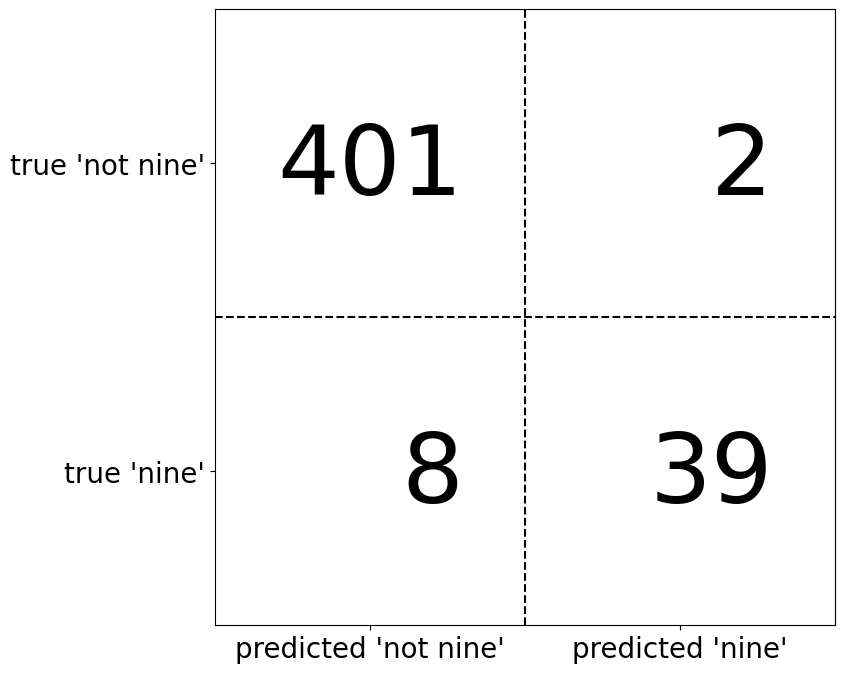

In [ ]:
mglearn.plots.plot_confusion_matrix_illustration()

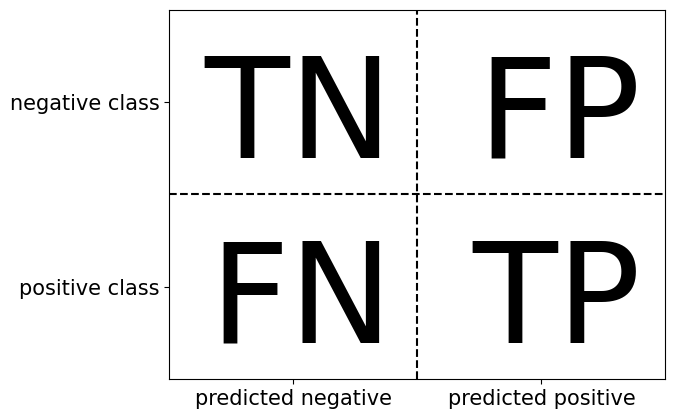

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

In [ ]:
 print("Наиболее часто встречающийся класс:")
 print(confusion_matrix(y_test, pred_most_frequent))
 print("\nДамми-модель: ")
 print(confusion_matrix(y_test, pred_dummy))
 print("\nДерево решений: ")
 print(confusion_matrix(y_test, pred_tree))
 print("\nлогистическая регрессия")
 print(confusion_matrix(y_test, pred_logreg))

Наиболее часто встречающийся класс:
[[403   0]
 [ 47   0]]

Дамми-модель: 
[[403   0]
 [ 47   0]]

Дерево решений: 
[[390  13]
 [ 24  23]]

логистическая регрессия
[[402   1]
 [  6  41]]


In [ ]:
from sklearn.metrics import f1_score
print("f1-мера наибольшая частота: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1-мера дамми: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1-мера логистическая регрессия: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1-мера наибольшая частота: 0.00
f1-мера дамми: 0.00
f1-мера дерево: 0.55
f1-мера логистическая регрессия: 0.92


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\beish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\beish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\beish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

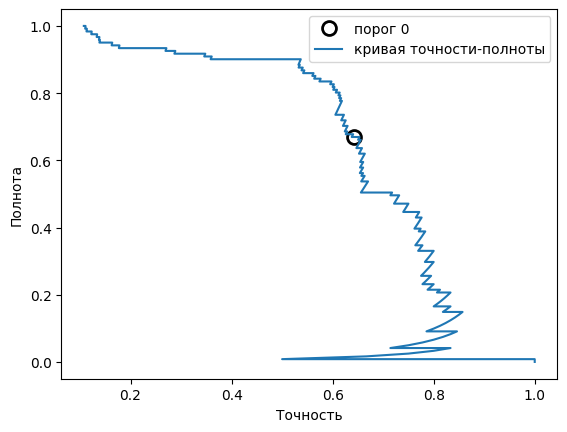

In [ ]:
# используем больший объем данных, чтобы получить более гладкую кривую
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2],
        random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# находим ближайший к нулю порог
close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="пoрог 0",
         fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="кривая точности-полноты")
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best")

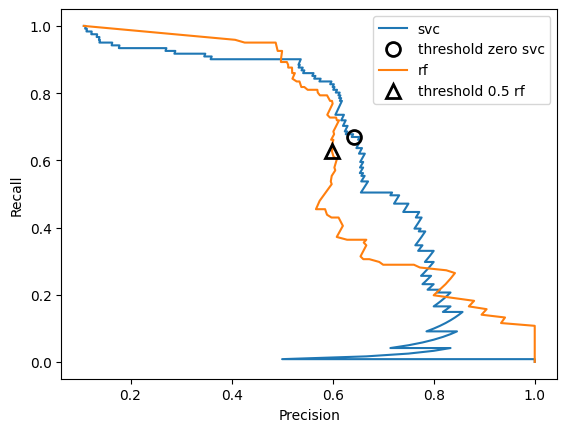

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")




In [ ]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Средняя точность гandom forest: {:.3f}".format(ap_rf))
print("Средняя точность svc: {:.3f}".format(ap_svc))

Средняя точность гandom forest: 0.660
Средняя точность svc: 0.666


In [ ]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split( digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


C:\Users\beish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


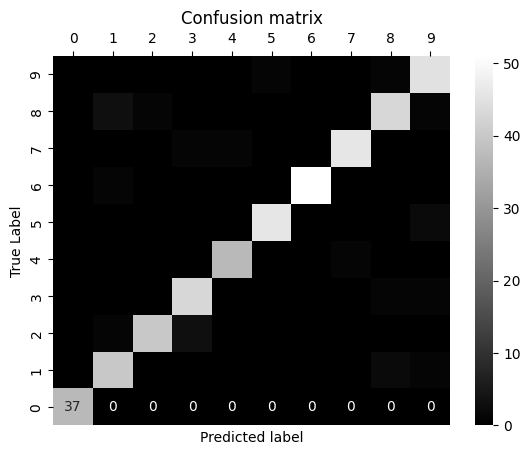

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#строим тепловую карту средних значений правильности перекрестной проверки
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, xticklabels=digits.target_names,
                 yticklabels = digits.target_names, cmap='gray')
ax.set(xlabel='Predicted label', ylabel="True Label")
ax.xaxis.tick_top()
plt.title("Confusion matrix")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [ ]:
print("Micro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


In [ ]:
# метрика качества классификационной модели по умолчанию правильность
print("Метрика качества по умолчанию: {}".format(cross_val_score(SVC(), digits.data, digits.target ==
                9)))
# значение параметра scoring="accuracy" не меняет результатов
explicit_accuracy=cross_val_score(SVC(), digits.data, digits.target == 9,
                                  scoring="accuracy")
print("Метрика качества явно заданная правильность: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("Метрика качества AUC: {}".format(roc_auc))

Метрика качества по умолчанию: [0.975      0.99166667 1.         0.99442897 0.98050139]
Метрика качества явно заданная правильность: [0.975      0.99166667 1.         0.99442897 0.98050139]
Метрика качества AUC: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [ ]:
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

# задаем не самую удачную сетку параметров для иллюстрации:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

# используем метрику по умолчанию, то есть правильность:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Решетчатый поиск с использованием правильности")
print("Наилучшие параметры:", grid.best_params_)
print("Наилучшее значение перекр проверки (правильность)): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

Решетчатый поиск с использованием правильности
Наилучшие параметры: {'gamma': 0.0001}
Наилучшее значение перекр проверки (правильность)): 0.976
AUC на тестовом наборе: 0.992
Правильность на тестовом наборе: 0.973


In [ ]:
# используем метрику качества AUC:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nРешетчатый поиск с использованием AUC")
print("Наилучшие параметры:", grid.best_params_)
print("Наилучшее значение перекр проверки (AUC): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))


Решетчатый поиск с использованием AUC
Наилучшие параметры: {'gamma': 0.01}
Наилучшее значение перекр проверки (AUC): 0.998
AUC на тестовом наборе: 1.000
Правильность на тестовом наборе: 1.000


### Улучшение Качества Классификации на Датасете Breast Cancer: Применение Перекрестной Проверки, Решетчатого Поиска и Метрик Модели

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC


In [ ]:
breast = load_breast_cancer()
X = pd.DataFrame(breast.data, columns=breast.feature_names)
y = pd.Series(breast.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(random_state=2)


#### Оценка модели с использованием перекрестной проверки

In [ ]:
cross = cross_val_score(logreg, X_train, y_train)
print("Оценки перекрестной проверки:", cross)
print("Средняя точность:", np.mean(cross))


Оценки перекрестной проверки: [0.94505495 0.95604396 0.97802198 0.96703297 0.91208791]
Средняя точность: 0.9516483516483516


In [ ]:
## Инициализация улучшенной модели
improved_model = RandomForestClassifier(random_state=42)

# Перекрестная проверка для оценки улучшенной модели
cross_val_scores_improved = cross_val_score(improved_model, X_train_scaled, y_train, cv=5)
print("Оценки перекрестной проверки (Improved Model):", cross_val_scores_improved)
print("Средняя точность:", np.mean(cross_val_scores_improved))

NameError: name 'X_train_scaled' is not defined

#### Решетчатый поиск

In [ ]:
print("Размер обучающего набора: {} размер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)

        if score > best_score:
            best_score = score
            best_parameters = {"C":C, "gamma": gamma}
print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшее значение параметров: {}".format(best_parameters))

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Загрузка данных
breast = load_breast_cancer()
X = breast.data
y = breast.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Учет баланса классов
improved_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=1, random_state=42)

# Использование стратифицированной кросс-валидации
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores_improved = cross_val_score(improved_model, X_train_scaled, y_train, cv=cv)

# Вывод результатов перекрестной проверки
print("Оценки перекрестной проверки (Improved Model):", cross_val_scores_improved)
print("Средняя точность:", np.mean(cross_val_scores_improved))


#### Метрики качества моделей

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(tree.score(X_test, y_test)))

#####

In [ ]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Правильность dummy: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1, max_iter=10000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Правильность dummy: {:.2f}".format(logreg.score(X_test, y_test)))

### Собственная модель

In [ ]:
import pandas as pd
import random


salaries = [40000, 50000, 60000, 70000, 80000]
cities = ['Bishkek', 'Moscow', 'London', 'Paris', 'New York', 'Tokyo']
ages = list(range(30, 66))
vacation_preferences = ['Shopping', 'Beach holiday', 'Mountain retreat', 'City exploration']
transport_preferences = ['auto', 'plane', 'train', 'cruise']
target_cities = ['London', 'Turkey', 'New York', 'Paris', 'Tokyo', 'Dubai']


data = {
    'salary': [random.choice(salaries) for _ in range(1000)],
    'city': [random.choice(cities) for _ in range(1000)],
    'age': [random.choice(ages) for _ in range(1000)],
    'vacation_prefer': [random.choice(vacation_preferences) for _ in range(1000)],
    'transport_prefer': [random.choice(transport_preferences) for _ in range(1000)],
    'target': [random.choice(target_cities) for _ in range(1000)]
}


df = pd.DataFrame(data)


In [ ]:
df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])

from sklearn.model_selection import train_test_split

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

random_data = {
    'salary': [random.choice(salaries)],
    'city': [random.choice(cities)],
    'age': [random.choice(ages)],
    'vacation_prefer': [random.choice(vacation_preferences)],
    'transport_prefer': [random.choice(transport_preferences)]
}


random_df = pd.DataFrame(random_data)
random_df_encoded = pd.get_dummies(random_df, columns=['city', 'vacation_prefer', 'transport_prefer'])


missing_columns = set(X_train.columns) - set(random_df_encoded.columns)
for column in missing_columns:
    random_df_encoded[column] = 0

random_df_encoded = random_df_encoded[X_train.columns]
prediction = model.predict(random_df_encoded)
person_info = {
    'salary': random_data['salary'][0],
    'city': random_data['city'][0],
    'age': random_data['age'][0],
    'vacation_prefer': random_data['vacation_prefer'][0],
    'transport_prefer': random_data['transport_prefer'][0]
}
accuracy1 = model.score(X_test, y_test)
print(f'Точность: {accuracy1}')
print(person_info)
print(f'Прогнозируемый город: {prediction[0]}')


In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

accuracy2 = best_model.score(X_test, y_test)
print(f'Accuracy: {accuracy2}')

random_data = {
    'salary': [random.choice(salaries)],
    'city': [random.choice(cities)],
    'age': [random.choice(ages)],
    'vacation_prefer': [random.choice(vacation_preferences)],
    'transport_prefer': [random.choice(transport_preferences)]
}

random_df = pd.DataFrame(random_data)
random_df_encoded = pd.get_dummies(random_df, columns=['city', 'vacation_prefer', 'transport_prefer'])

missing_columns = set(X_train.columns) - set(random_df_encoded.columns)
for column in missing_columns:
    random_df_encoded[column] = 0

random_df_encoded = random_df_encoded[X_train.columns]


prediction = best_model.predict(random_df_encoded)

person_info = {
    'salary': random_data['salary'][0],
    'city': random_data['city'][0],
    'age': random_data['age'][0],
    'vacation_prefer': random_data['vacation_prefer'][0],
    'transport_prefer': random_data['transport_prefer'][0]
}

print(f'Прогнозируемый город: {prediction[0]}')
